In [1]:
import wisps
import wisps.simulations as wispsim
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
pnts=pd.read_pickle(wisps.OUTPUT_FILES+'/pointings_correctedf110.pkl')

In [3]:
wisps.drop_nan((pnts[0]).mags['F110'])

array([], dtype=float64)

In [4]:
madf=pd.DataFrame.from_records([x.mag_limits for x in pnts])
madf['survey']=[x.survey for x in pnts]
madf['snr1']=[np.nanmedian(np.log10(x.snr1)) for x in pnts]
madf['exp']=[np.nanmedian(x.exposure_times) for x in pnts]

In [5]:
mags=pd.DataFrame.from_records([x.mags for x in pnts])
mags['exp']=[x.exposure_times.mean() for x in pnts]
mags['survey']=[x.survey for x in pnts]

In [6]:
hmags=mags.F140[np.logical_and(mags.exp.between(4000, 5000), mags.survey=='wisps')].values.flatten()
wmags=mags.F140[np.logical_and(mags.exp.between(4000, 5000), mags.survey=='hst3d')].values.flatten()

22.566082675926566
21.721


findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


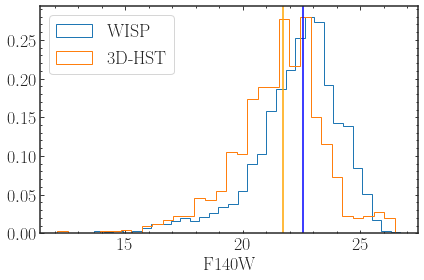

In [7]:
h=plt.hist(wisps.drop_nan(np.hstack(wmags).astype(float)), label='WISP', bins=32, density=True, histtype='step')
h=plt.hist(wisps.drop_nan(np.hstack(hmags).astype(float)),label='3D-HST', bins=32, density=True,histtype='step')

plt.xlabel('F140W')
plt.axvline(np.nanmedian(np.hstack(wmags).astype(float)), c='blue')
plt.axvline(np.nanmedian(np.hstack(hmags).astype(float)), c='orange')

print (np.nanmedian(np.hstack(wmags).astype(float)))
print (np.nanmedian(np.hstack(hmags).astype(float)))
plt.legend()
plt.tight_layout()
plt.minorticks_on()

In [8]:

def get_max_value(values):
    values=wisps.drop_nan(values)
    if len(values)<1:
        return np.nan
    if len(values)>=1:
        kernel = wisps.kernel_density(values)
        height = kernel.pdf(values)
        mode_value = values[np.argmax(height)]
        return height, float(mode_value)


In [9]:
p=np.random.choice(pnts)

m=wisps.drop_nan(p.mags['F140'])
ml=p.mag_limits['F140']
for p in pnts:
    #p=np.random.choice(pnts)
    fig, ax=plt.subplots(ncols=3, figsize=(14,4))
    for k, a in zip(['F110', 'F140', 'F160'], ax):
        m=wisps.drop_nan(p.mags[k])
        if len(m) < 50:
            pass
        else:
            ml=p.mag_limits[k]
            kde, mx= get_max_value(m)
            a.plot(m, kde, '.')
            h=a.hist(m, bins=32, histtype='step', density=True)
            a.axvline(ml, c='b')
            a.axvline(mx, c='k')
            a.set_title(p.name.upper() + ' '+ k.upper())
            a.minorticks_on()

            
        
    
   
  
        
      


<AxesSubplot:xlabel='exp', ylabel='F140'>

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


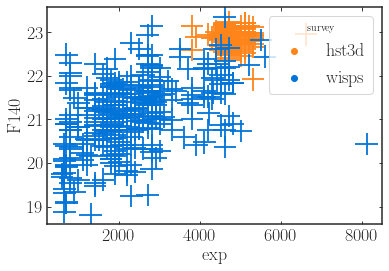

In [10]:
import seaborn as sns
sns.scatterplot(y='F140', x='exp', hue='survey', s=500., palette=['#FF851B', '#0074D9'], 
                data=madf, marker='+')
#plt.xlim([0.5, 1.5])

In [11]:
bf= wisps.get_big_file()
stars=(bf[ bf.mstar_flag !=0]).reset_index(drop=True)

In [12]:
dfs=[]
for idx in np.arange(80):
    #print (500+50*(idx-1), 500+50*idx)
    dfs.append(stars[(stars.exposure_time.apply(float).between(500+50*(idx-1), 500+50*idx)) & (~stars.F160.isna()) ])
#df1=stars[(stars.exposure_time.apply(float).between(2000, 4000)) & (~stars.F160.isna()) ]
#df2=stars[(stars.exposure_time.apply(float).between(4000, 6000)) & (~stars.F160.isna()) ]
#df3=stars[(stars.exposure_time.apply(float) > 3000) & (~stars.F160.isna())]

In [13]:
dfs=[x for x in dfs if not x.empty]

In [14]:
len(dfs)

35

703.0
4012.0


Text(0, 0.5, 'Log (unc/ F140)')

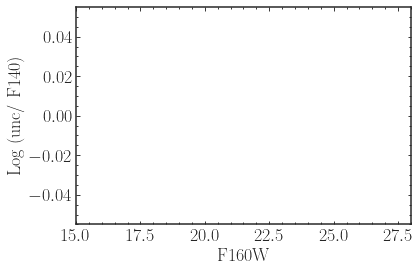

In [15]:
fig, ax=plt.subplots()


#ax.scatter(df1.F160, df1.F160_er, s=5., alpha=0.3)
#ax.scatter(df2.F160, df2.F160_er, s=5., alpha=0.3)
medians=[d.exposure_time.median() for d in dfs]
sns.set_palette('coolwarm')

df0=[x for x in dfs if x.exposure_time.median() <1500][0]
df1=[x for x in dfs if x.exposure_time.median() > 4000][0]

print (df0.exposure_time.median())
print (df1.exposure_time.median())

for idx in np.argsort(medians):
    #mask=np.logical_and(dfs[idx].F160 > 10, dfs[idx].F160 <30 )
    #print (len(dfs[idx].F160[mask]))
    _, p= wisps.fit_with_nsigma_clipping(dfs[idx].F160, np.log10(dfs[idx].F160_er/dfs[idx].F160),
                                         abs(np.log10(dfs[idx].F160_er/dfs[idx].F160)/10000.), 
                                         n=1, sigma=5)
    #print (p)
    ax.plot(np.arange(15, 40), p(np.arange(15, 40)))
#

#pol= np.poly1d(np.polyfit(dfs[idx].F160[mask], dfs[idx].F160_er[mask], 6))

#ax.scatter(df1.F160, np.log10(df1.F160_er/df1.F160),s=1, c='#FF4136', label='med {}'.format(df1.exposure_time.median()))
#ax.scatter(df0.F160, np.log10(df0.F160_er/df0.F160),s=1, c='#0074D9', label='med {}'.format(df0.exposure_time.median()))

#ax.plot(np.arange(15, 27), pol(np.arange(15, 27)))

plt.xlim(15, 28)
#plt.ylim([-0.01, 0.1])
plt.minorticks_on()

plt.xlabel('F160W')
plt.ylabel(r'Log (unc/ F140)')

 
0.6086 x - 19.75


Text(0, 0.5, 'Error/Mag')

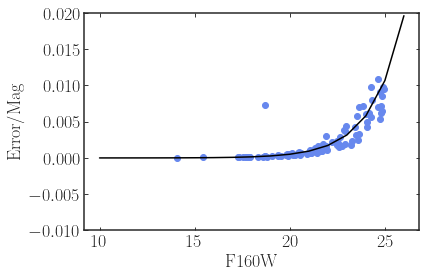

In [65]:
stars=stars.sort_values('exposure_time')
dfsml=stars[stars.exposure_time==603]

x=dfsml.F140
mask= np.logical_and(x > 15, x<27)
y=dfsml.F140_er/dfsml.F140

fit=np.poly1d(np.polyfit(x[mask], np.log(y[mask]), 1))

print (fit)
plt.scatter(x, y)
plt.plot(np.arange(10, 27), np.exp(fit(np.arange(10, 27))), c='k')
plt.ylim([-0.01, 0.02])
plt.xlabel('F160W')
#plt.yscale('log')
plt.ylabel('Error/Mag')

In [66]:
stars.expousre_time

AttributeError: 'DataFrame' object has no attribute 'expousre_time'

In [39]:
stars

,snr1,snr2,snr3,snr4,H_2O-1/J-Cont,H_2O-1/J-Cont_er,H_2O-2/H_2O-1,H_2O-2/H_2O-1_er,H-cont/H_2O-1,H-cont/H_2O-1_er,...,RA,DEC,survey,x,pointing,exposure_time,observation_date,nG141,mstar_flag,flux_radius
1134,0.668264,0.893736,1.027727,0.906970,2.245977,22.166052,0.995828,16.142620,0.771099,4.301910,...,326.037415,14.8121,WISP,0.694424,par263,603.0,2012-11-12,86,1,NaN
27429,18.343784,20.433226,21.395914,20.433226,1.023096,0.087109,0.917703,0.072781,0.888949,0.071988,...,326.063873,14.7994,WISP,2.110202,par263,603.0,2012-11-12,179,1,NaN
14318,1.018930,1.092547,1.179757,1.110129,0.960723,8.383745,0.938523,22.970895,0.701932,8.782062,...,185.218521,45.7425,WISP,0.591358,par233,603.0,2012-07-28,132,1,NaN
14315,1.237257,1.235376,1.215999,1.269898,0.949161,2.284239,0.769996,3.940172,0.607230,13.857155,...,185.224640,45.7453,WISP,0.661219,par233,603.0,2012-07-28,195,1,NaN
14314,1.249729,1.395114,1.542027,1.139831,-0.287437,3.229689,-3.490068,144.293094,-3.952187,10.812878,...,185.219849,45.7522,WISP,0.541708,par233,603.0,2012-07-28,71,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29967,17.795860,20.781681,23.805539,20.873258,1.016693,0.087849,1.039078,0.094744,1.024533,0.086074,...,147.230774,13.8348,WISP,2.155809,par427,14635.0,2016-05-06,170,1,NaN
29968,3.693593,3.306184,3.019426,3.458640,1.608822,0.792238,0.608101,0.293105,0.390531,0.237945,...,147.242599,13.8395,WISP,0.738584,par427,14635.0,2016-05-06,152,1,NaN
29990,14.291403,14.504405,14.533887,15.054266,1.077990,0.105145,0.832612,0.084384,0.703450,0.067357,...,147.212509,13.8337,WISP,1.722116,par427,14635.0,2016-05-06,182,1,NaN
29996,1.607669,3.151929,4.447580,2.541008,0.959877,3.609330,2.242967,40.255504,1.856206,8.976700,...,147.238586,13.8209,WISP,1.125321,par427,14635.0,2016-05-06,148,1,NaN


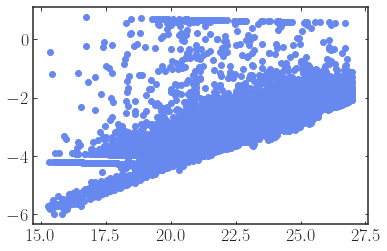

In [37]:
plt.scatter(x[mask], np.log10(y[mask]))

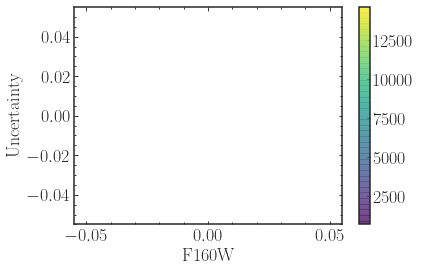

In [31]:
#c=plt.scatter(x[mask],y[mask], 
#            s=2, c=stars.exposure_time[mask], alpha=0.5, cmap='viridis')
plt.plot(np.arange(1, 30), np.exp(fit(np.arange(1, 30))) )
plt.colorbar(c)
#plt.xlim([15, 28.])
#plt.ylim([-0.01, 0.06])
plt.xlabel('F160W')
plt.ylabel('Uncertainty')
plt.minorticks_on()